In [1]:
import numpy as np

In [13]:
# np.random.rand()는 0.0 아상 1.0 미만의 무작위 수 생성, 그 안에 인자를 넣으면 해당 숫자만큼의 무작위 수 생성

class Bandit:
    def __init__(self, arms = 10): # arms = 슬롯머신 대수
        self.rates = np.random.rand(arms) # 슬롯머신 각각의 승률 설정(무작위)
    def play(self, arm): # arm 은 몇 번째 슬롯머신을 플레이 할지 지정
        rate = self.rates[arm]
        #arm번쨰 머신의 승률을 가져옴
        if rate > np.random.rand(): # 승률과 무작위 수 하나를 비교하여 승률이 더 크면 승리
            return 1
        else: # 승률이 무작위 수보다 작으면 패배
            return 0

In [15]:
bandit = Bandit()

for i in range(3):
    print(bandit.play(0)) #0번째 슬롯머신을 3회 연속으로 플레이

1
1
1


In [21]:
# 0번째 슬롯머신에만 집중하여 해당 슬롯머신의 가치 추정치 구하기
bandit = Bandit()
Q = 0

for n in range(1,11): # 10번 반복
    reward = bandit.play(0) # 0번째 슬롯머신 플레이
    Q += (reward - Q) / n # 가치 추정치 갱신
    print(Q)

0.0
0.5
0.6666666666666666
0.5
0.6
0.5
0.5714285714285714
0.5
0.4444444444444444
0.5


In [23]:
# 10대의 슬롯머신 각각의 가치 추정치 구하기
bandit = Bandit()
Qs = np.zeros(10) # 각 슬롯머신의 가치 추정치
ns = np.zeros(10) # 각 슬롯머신의 플레이 횟수

for n in range(10):
    action = np.random.randint(0,10) # 무작위 행동 (임의의 슬롯머신 선택)
    reward = bandit.play(action)

    ns[action] += 1 # action번째 슬롯머신을 플레이한 횟수 추가
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[0.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[0.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[0.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[0.         0.         0.         0.         0.66666667 0.
 0.         0.         0.         0.        ]
[0.         0.         0.         0.         0.66666667 0.
 0.         0.         0.         0.        ]
[0.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
[0.  0.  0.  0.  0.4 0.  0.5 0.  0.  0. ]


In [31]:
# 각 슬롯머신의 가치 추정치를 활용하여 ε-탐욕정책을 따라 행동하는 Agent 생성
class Agent:
    def __init__(self, epsilon, action_size = 10): # action_size는 에이전트가 행동할 수 있는 선택의 가지 수 (슬롯머신 개수)
        self.epsilon = epsilon # 무작위로 행동할 확률 (탐색 확률)
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward): # 슬롯머신의 가치 추정
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self): # 행동 선택 (ε-탐욕정책)
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs)) # self.epsioln의 확률로 무작위 행동 선택
        return np.argmax(self.Qs) # 그 외는 가치 추정치가 가장 큰 탐욕 행동 선택

792


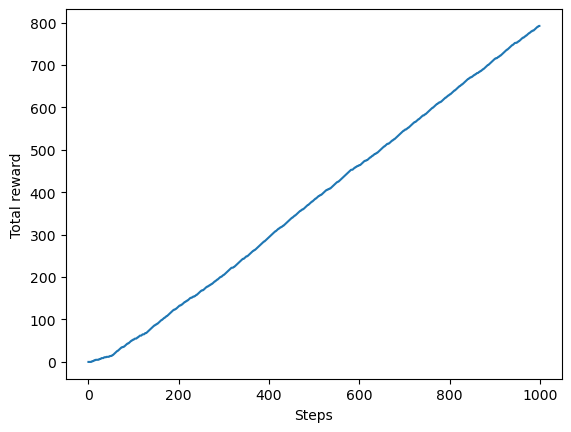

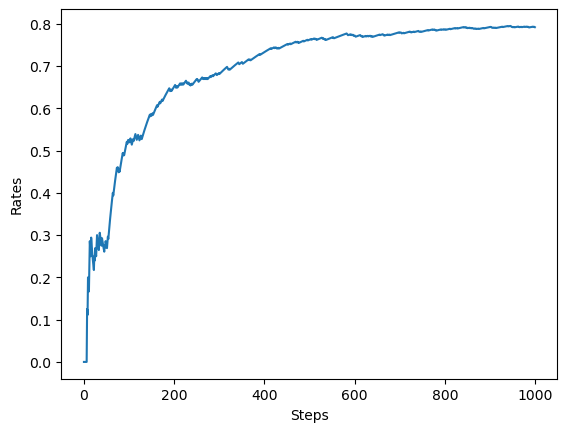

In [35]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = [] # 보상 합
rates = [] # 승률

for step in range(steps):
    action = agent.get_action() # 행동 선택
    reward = bandit.play(action) # 실제로 플레이하고 보상을 받음
    agent.update(action, reward) # 행동과 보상을 통해 학습
    total_reward += reward

    total_rewards.append(total_reward) # 현재까지의 보상 합 저장
    rates.append(total_reward / (step +1)) # 현재까지의 승률 저장
print(total_reward)

# 그래프 그리기: 단계별 보상 총합
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# 그래프 그리기: 단계별 승률
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

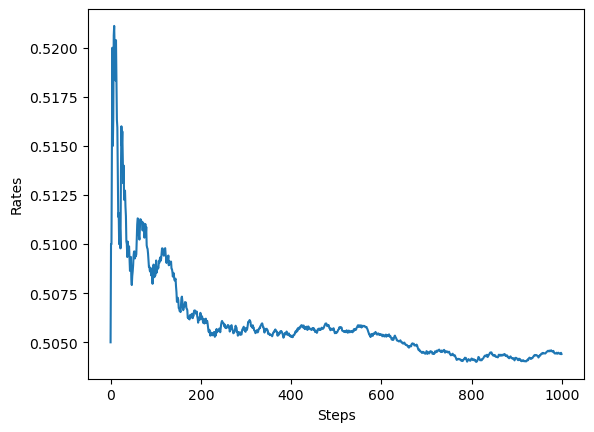

In [47]:
# 무작위성 때문에 한 번의 실험만으로 평가하긴 어려움 (매 시험을 반복할때마다 결과값이 달라짐) -> 1000번을 플레이하는 실험을 200번 반복하여 평균 내기
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # (200, 1000) 형상 배열

for run in range(runs): # 200번 실험
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        anction = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))

    all_rates[run] = rates # 보상 결과 기록

avg_rates = np.average(all_rates, axis = 0) # 각 단계의 평균 저장

# 그래프 그리기: 단계별 승률(200번 실험 후 평균)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

In [49]:
# 플레이할 때마다 self.rates에 작은 노이즈를 추가
# np.random.rand()는 평균0, 표준편차 1의 정규분포에서 무작위 수 생성
class NonStatBandit:
    def __init__(self, arms = 10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.rand(self.arms) # 노이즈 추가
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [53]:
# alpha의 고정값으로 갱신
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions = 10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action)
        self.alpha = alpha # 고정값 a

    def update(self, action, reward):
        # a로 갱신
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)